In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [4]:
#Create a path to where your data is stored.
path = r'C:\Users\Hiroshi\Documents\06-2024 ClimateWins'

In [5]:
#Read in the European weather data.
climate_nodate_cleaned = pd.read_csv(os.path.join(path, '01 Data','climate_nodate_cleaned.csv'))
climate_nodate_cleaned

Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0               0                  7            0.85          1.0180   
1               1                  6            0.84          1.0180   
2               2                  8            0.90          1.0180   
3               3                  3            0.92          1.0180   
4               4                  6            0.95          1.0180   
...           ...                ...             ...             ...   
22945       22945                  1            0.79          1.0248   
22946       22946                  6            0.77          1.0244   
22947       22947                  4            0.76          1.0227   
22948       22948                  5            0.80          1.0212   
22949       22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
0                  6.5             0.8            10.9  ...   
1                  6.1             3.3            10.1  ...   
2                  8.5             5.1             9.9  ...   
3                  6.3             3.8            10.6  ...   
4                  3.0            -0.7             6.0  ...   
...                ...             ...             ...  ...   
22945             15.9            11.4            21.4  ...   
22946             16.7            14.3            21.9  ...   
22947             16.7            13.1            22.4  ...   
22948             15.4            11.6            21.1  ...   
22949             13.5             9.9            19.2  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                     4.9                     5               0.88   
1                     5.0                     7               0.91   
2                     4.1                     7               0.91   
3                     2.3                     7               0.86   
4                     4.3                     3               0.80   
...                   ...                   ...                ...   
22945                14.2                     5               0.82   
22946                14.3                     5               0.82   
22947                14.4                     5               0.82   
22948                12.4                     5               0.82   
22949                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142                       1.13                    0.41   
22946             1.0142                       1.13                    

In [6]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, '01 Data','Weather_prediction.csv'))
climate

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1                  7               2.1            0.85   
1      19600102      1                  6               2.1            0.84   
2      19600103      1                  8               2.1            0.90   
3      19600104      1                  3               2.1            0.92   
4      19600105      1                  6               2.1            0.95   
...         ...    ...                ...               ...             ...   
22945  20221027     10                  1               2.1            0.79   
22946  20221028     10                  6               2.1            0.77   
22947  20221029     10                  4               2.1            0.76   
22948  20221030     10                  5               2.1            0.80   
22949  20221031     10                  5               2.1            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0              1.0180                    0.32                 0.09   
1              1.0180                    0.36                 1.05   
2              1.0180                    0.18                 0.30   
3              1.0180                    0.58                 0.00   
4              1.0180                    0.65                 0.14   
...               ...                     ...                  ...   
22945          1.0248                    1.34                 0.22   
22946          1.0244                    1.34                 0.22   
22947          1.0227                    1.34                 0.22   
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                     0             0.7  ...                     5   
1                     0             1.1  ...                     7   
2                     0             0.0  ...                     7   
3                     0             4.1  ...                     7   
4                     0             5.4  ...                     3   
...                 ...             ...  ...                   ...   
22945                 0             7.7  ...                     5   
22946                 0             5.4  ...                     5   
22947                 0             6.1  ...                     5   
22948                 0             5.8  ...                     5   
22949                 0             3.2  ...                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0                   0.88             1.0003                       0.45   
1                   0.91             1.0007                       0.25   
2                   0.91             1.0096                       0.17   
3                   0.86             1.0184                       0.13   
4                   0.80             1.0328                       0.46   
...                  ...                ...                        ...   
22945               0.82             1.0142                       1.13   
22946               0.82             1.0142                       1.13   
22947               0.82             1.0142                       1.13   
22948               0.82             1.0142                       1.13   
22949               0.82             1.0142                       1.13   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                        0.34                    0                4.7   
1                        0.84                    0                0.7   
2                        0.08                    0                0.1   
3                        0.98                    0                0.0   
4                        0.00                    0                5.7   
...                       ...                  ...   

In [7]:
#Read in the pleasant weather data.
weather = pd.read_csv(os.path.join(path, '01 Data','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
weather

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [8]:
climate_nodate_cleaned = climate_nodate_cleaned.drop(['Unnamed: 0'], axis=1)

In [9]:
climate_nodate_cleaned.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0            10.9                     1  ...                 4.9   
1            10.1                     6  ...                 5.0   
2             9.9                     6  ...                 4.1   
3            10.6                     8  ...                 2.3   
4             6.0                     8  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 135 columns]

In [10]:
#Combine date and cleaned data
climate_date = pd.concat([climate['DATE'],climate_nodate_cleaned], axis=1)
climate_date

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101                  7            0.85          1.0180   
1      19600102                  6            0.84          1.0180   
2      19600103                  8            0.90          1.0180   
3      19600104                  3            0.92          1.0180   
4      19600105                  6            0.95          1.0180   
...         ...                ...             ...             ...   
22945  20221027                  1            0.79          1.0248   
22946  20221028                  6            0.77          1.0244   
22947  20221029                  4            0.76          1.0227   
22948  20221030                  5            0.80          1.0212   
22949  20221031                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
0                  6.5             0.8            10.9  ...   
1                  6.1             3.3            10.1  ...   
2                  8.5             5.1             9.9  ...   
3                  6.3             3.8            10.6  ...   
4                  3.0            -0.7             6.0  ...   
...                ...             ...             ...  ...   
22945             15.9            11.4            21.4  ...   
22946             16.7            14.3            21.9  ...   
22947             16.7            13.1            22.4  ...   
22948             15.4            11.6            21.1  ...   
22949             13.5             9.9            19.2  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                     4.9                     5               0.88   
1                     5.0                     7               0.91   
2                     4.1                     7               0.91   
3                     2.3                     7               0.86   
4                     4.3                     3               0.80   
...                   ...                   ...                ...   
22945                14.2                     5               0.82   
22946                14.3                     5               0.82   
22947                14.4                     5               0.82   
22948                12.4                     5               0.82   
22949                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142                       1.13                    0.41   
22946             1.0142                       1.13                    0.41   
22947             1.

In [11]:
#Reduce your dataset to a single year
dfyear = climate_date.loc[climate_date['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])] #<-----INSERT YEAR HERE
dfyear

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18628  20110101                  8            0.97          1.0232   
18629  20110102                  8            0.94          1.0234   
18630  20110103                  4            0.93          1.0254   
18631  20110104                  6            0.89          1.0208   
18632  20110105                  5            0.79          1.0142   
...         ...                ...             ...             ...   
22276  20201227                  8            0.70          1.0007   
22277  20201228                  7            0.74          0.9828   
22278  20201229                  6            0.74          0.9945   
22279  20201230                  6            0.85          1.0069   
22280  20201231                  7            0.86          1.0069   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18628                    0.13                 0.00             0.0   
18629                    0.13                 0.00             0.0   
18630                    0.64                 0.00             6.1   
18631                    0.38                 0.00             1.0   
18632                    0.64                 0.06             6.5   
...                       ...                  ...             ...   
22276                    0.26                 0.41             0.0   
22277                    0.26                 0.11             0.4   
22278                    0.25                 0.22             0.2   
22279                    0.32                 0.04             0.3   
22280                    0.21                 0.71             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
18628             -0.2            -0.8             0.3  ...   
18629             -0.2            -3.9             1.4  ...   
18630             -3.3            -5.2            -0.9  ...   
18631             -3.6            -5.8            -1.9  ...   
18632             -0.8            -5.4             2.5  ...   
...                ...             ...             ...  ...   
22276              1.7            -3.6             9.9  ...   
22277              4.6             1.9             8.1  ...   
22278              4.4             1.6             6.9  ...   
22279              2.6             0.5             4.9  ...   
22280              1.9            -1.2             4.8  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
18628                -0.5                     5               0.82   
18629                -2.4                     5               0.82   
18630                -2.6                     5               0.82   
18631                -5.6                     5               0.82   
18632                -0.2                     5               0.82   
...                   ...                   ...                ...   
22276                 5.3                     5               0.82   
22277                 4.8                     5               0.82   
22278                 5.6                     5               0.82   
22279                 4.4                     5               0.82   
22280                 4.5                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
18628             1.0142                       0.13                    0.41   
18629             1.0142                       0.15                    0.41   
18630             1.0142                       0.17                    0.41   
18631             1.0142                       0.22                    0.41   
18632             1.0142                       0.23                    0.41   
...                  ...                        ...                     ...   
22276             1.0142                       1.13                    0.41   
22277             1.0142                       1.13                    0.41   
22278             1.

In [12]:
climate_nodate = dfyear.drop(['DATE'], axis=1)

In [13]:
#Reduce your dataset to a single year
weather_year = weather.loc[weather['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])] #<-----INSERT YEAR HERE
weather_year

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18628  20110101                       0                          0   
18629  20110102                       0                          0   
18630  20110103                       0                          0   
18631  20110104                       0                          0   
18632  20110105                       0                          0   
...         ...                     ...                        ...   
22276  20201227                       0                          0   
22277  20201228                       0                          0   
22278  20201229                       0                          0   
22279  20201230                       0                          0   
22280  20201231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18628                          0                        0   
18629                          0                        0   
18630                          0                        0   
18631                          0                        0   
18632                          0                        0   
...                          ...                      ...   
22276                          0                        0   
22277                          0                        0   
22278                          0                        0   
22279                          0                        0   
22280                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18628                            0                          0   
18629                            0                          0   
18630                            0                          0   
18631                            0                          0   
18632                            0                          0   
...                            ...                        ...   
22276                            0                          0   
22277                            0                          0   
22278                            0                          0   
22279                            0                          0   
22280                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18628                        0                           0   
18629                        0                           0   
18630                        0                           0   
18631                        0                           0   
18632                        0                           0   
...                        ...                         ...   
22276                        0                           0   
22277                        0                           0   
22278                        0                           0   
22279                        0                           0   
22280                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18628                            0                        0   
18629                            0                        0   
18630                            0                        0   
18631                            0                        0   
18632                            0                        0   
...                            ...                      ...   
22276                            0                        0   
22277                            0                        0   
22278                            0                        0   
22279                            0                        0   
22280                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18628                          0                      0   
18629                          0    

In [14]:
# Drop date column from prediction data
weather_year = weather_year.drop(['DATE'], axis=1)

In [15]:
weather_year 

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18628                       0                          0   
18629                       0                          0   
18630                       0                          0   
18631                       0                          0   
18632                       0                          0   
...                       ...                        ...   
22276                       0                          0   
22277                       0                          0   
22278                       0                          0   
22279                       0                          0   
22280                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18628                          0                        0   
18629                          0                        0   
18630                          0                        0   
18631                          0                        0   
18632                          0                        0   
...                          ...                      ...   
22276                          0                        0   
22277                          0                        0   
22278                          0                        0   
22279                          0                        0   
22280                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18628                            0                          0   
18629                            0                          0   
18630                            0                          0   
18631                            0                          0   
18632                            0                          0   
...                            ...                        ...   
22276                            0                          0   
22277                            0                          0   
22278                            0                          0   
22279                            0                          0   
22280                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18628                        0                           0   
18629                        0                           0   
18630                        0                           0   
18631                        0                           0   
18632                        0                           0   
...                        ...                         ...   
22276                        0                           0   
22277                        0                           0   
22278                        0                           0   
22279                        0                           0   
22280                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18628                            0                        0   
18629                            0                        0   
18630                            0                        0   
18631                            0                        0   
18632                            0                        0   
...                            ...                      ...   
22276                            0                        0   
22277                            0                        0   
22278                            0                        0   
22279                            0                        0   
22280                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18628                          0                      0   
18629                          0                      0   
18630                          0                      0   
18631                          0  

In [16]:
tf.random.set_seed(42)

In [17]:
X = climate_nodate
y = weather_year
X

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18628                  8            0.97          1.0232   
18629                  8            0.94          1.0234   
18630                  4            0.93          1.0254   
18631                  6            0.89          1.0208   
18632                  5            0.79          1.0142   
...                  ...             ...             ...   
22276                  8            0.70          1.0007   
22277                  7            0.74          0.9828   
22278                  6            0.74          0.9945   
22279                  6            0.85          1.0069   
22280                  7            0.86          1.0069   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18628                    0.13                 0.00             0.0   
18629                    0.13                 0.00             0.0   
18630                    0.64                 0.00             6.1   
18631                    0.38                 0.00             1.0   
18632                    0.64                 0.06             6.5   
...                       ...                  ...             ...   
22276                    0.26                 0.41             0.0   
22277                    0.26                 0.11             0.4   
22278                    0.25                 0.22             0.2   
22279                    0.32                 0.04             0.3   
22280                    0.21                 0.71             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18628             -0.2            -0.8             0.3                     4   
18629             -0.2            -3.9             1.4                     8   
18630             -3.3            -5.2            -0.9                     7   
18631             -3.6            -5.8            -1.9                     4   
18632             -0.8            -5.4             2.5                     1   
...                ...             ...             ...                   ...   
22276              1.7            -3.6             9.9                     7   
22277              4.6             1.9             8.1                     4   
22278              4.4             1.6             6.9                     2   
22279              2.6             0.5             4.9                     7   
22280              1.9            -1.2             4.8                     7   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
18628  ...                -0.5                     5               0.82   
18629  ...                -2.4                     5               0.82   
18630  ...                -2.6                     5               0.82   
18631  ...                -5.6                     5               0.82   
18632  ...                -0.2                     5               0.82   
...    ...                 ...                   ...                ...   
22276  ...                 5.3                     5               0.82   
22277  ...                 4.8                     5               0.82   
22278  ...                 5.6                     5               0.82   
22279  ...                 4.4                     5               0.82   
22280  ...                 4.5                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
18628             1.0142                       0.13                    0.41   
18629             1.0142                       0.15                    0.41   
18630             1.0142                       0.17                    0.41   
18631             1.0142                       0.22                    0.41   
18632             1.0142                       0.23                    0.41   
...                  ...                        ...                     ...   
22276             1.0142      

In [18]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [19]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922, 15)
(731, 135) (731, 15)


#### Grid Search

In [39]:
# creating a RF classifier
clf = RandomForestClassifier()

In [83]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [84]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


C:\Users\Hiroshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
576 fits failed out of a total of 1728.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hiroshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hiroshi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Hiroshi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hiroshi\anaconda3\Lib\

Search took 17.06343751748403 minutes


In [85]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.5465434633812457


#### Random search

In [138]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [140]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [142]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 18.722544463475547 minutes


In [143]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 310}
Best RANDOM search score is: 0.5314852840520192


In [144]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.5465434633812457
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 310}
Best RANDOM search score is: 0.5314852840520192


In [148]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 310, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=4, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=6,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=310)

In [149]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5595075239398085


In [91]:
pred = ['Bad weather','Good weather']

[Text(0.32386222551809296, 0.9722222222222222, 'x[98] <= 16.85\nentropy = 0.697\nsamples = 1845\nvalue = [[2052, 870]\n[1804, 1118]\n[1836, 1086]\n[2231, 691]\n[2205, 717]\n[2204, 718]\n[2731, 191]\n[1974, 948]\n[2190, 732]\n[1423, 1499]\n[2188, 734]\n[2446, 476]\n[2922, 0]\n[2294, 628]\n[2922, 0]]'),
 Text(0.10038848585310856, 0.9166666666666666, 'x[17] <= 17.15\nentropy = 0.262\nsamples = 1004\nvalue = [[1491, 79]\n[1396, 174]\n[1453, 117]\n[1511, 59]\n[1499, 71]\n[1461, 109]\n[1557, 13]\n[1481, 89]\n[1503, 67]\n[1142, 428]\n[1570, 0]\n[1521, 49]\n[1570, 0]\n[1515, 55]\n[1570, 0]]'),
 Text(0.04397079351444218, 0.8611111111111112, 'x[8] <= 14.65\nentropy = 0.112\nsamples = 763\nvalue = [[1165, 21]\n[1186, 0]\n[1173, 13]\n[1171, 15]\n[1168, 18]\n[1146, 40]\n[1186, 0]\n[1159, 27]\n[1165, 21]\n[994, 192]\n[1186, 0]\n[1175, 11]\n[1186, 0]\n[1181, 5]\n[1186, 0]]'),
 Text(0.018361430258778053, 0.8055555555555556, 'x[26] <= 9.45\nentropy = 0.04\nsamples = 667\nvalue = [[1033, 0]\n[1033, 0]\n

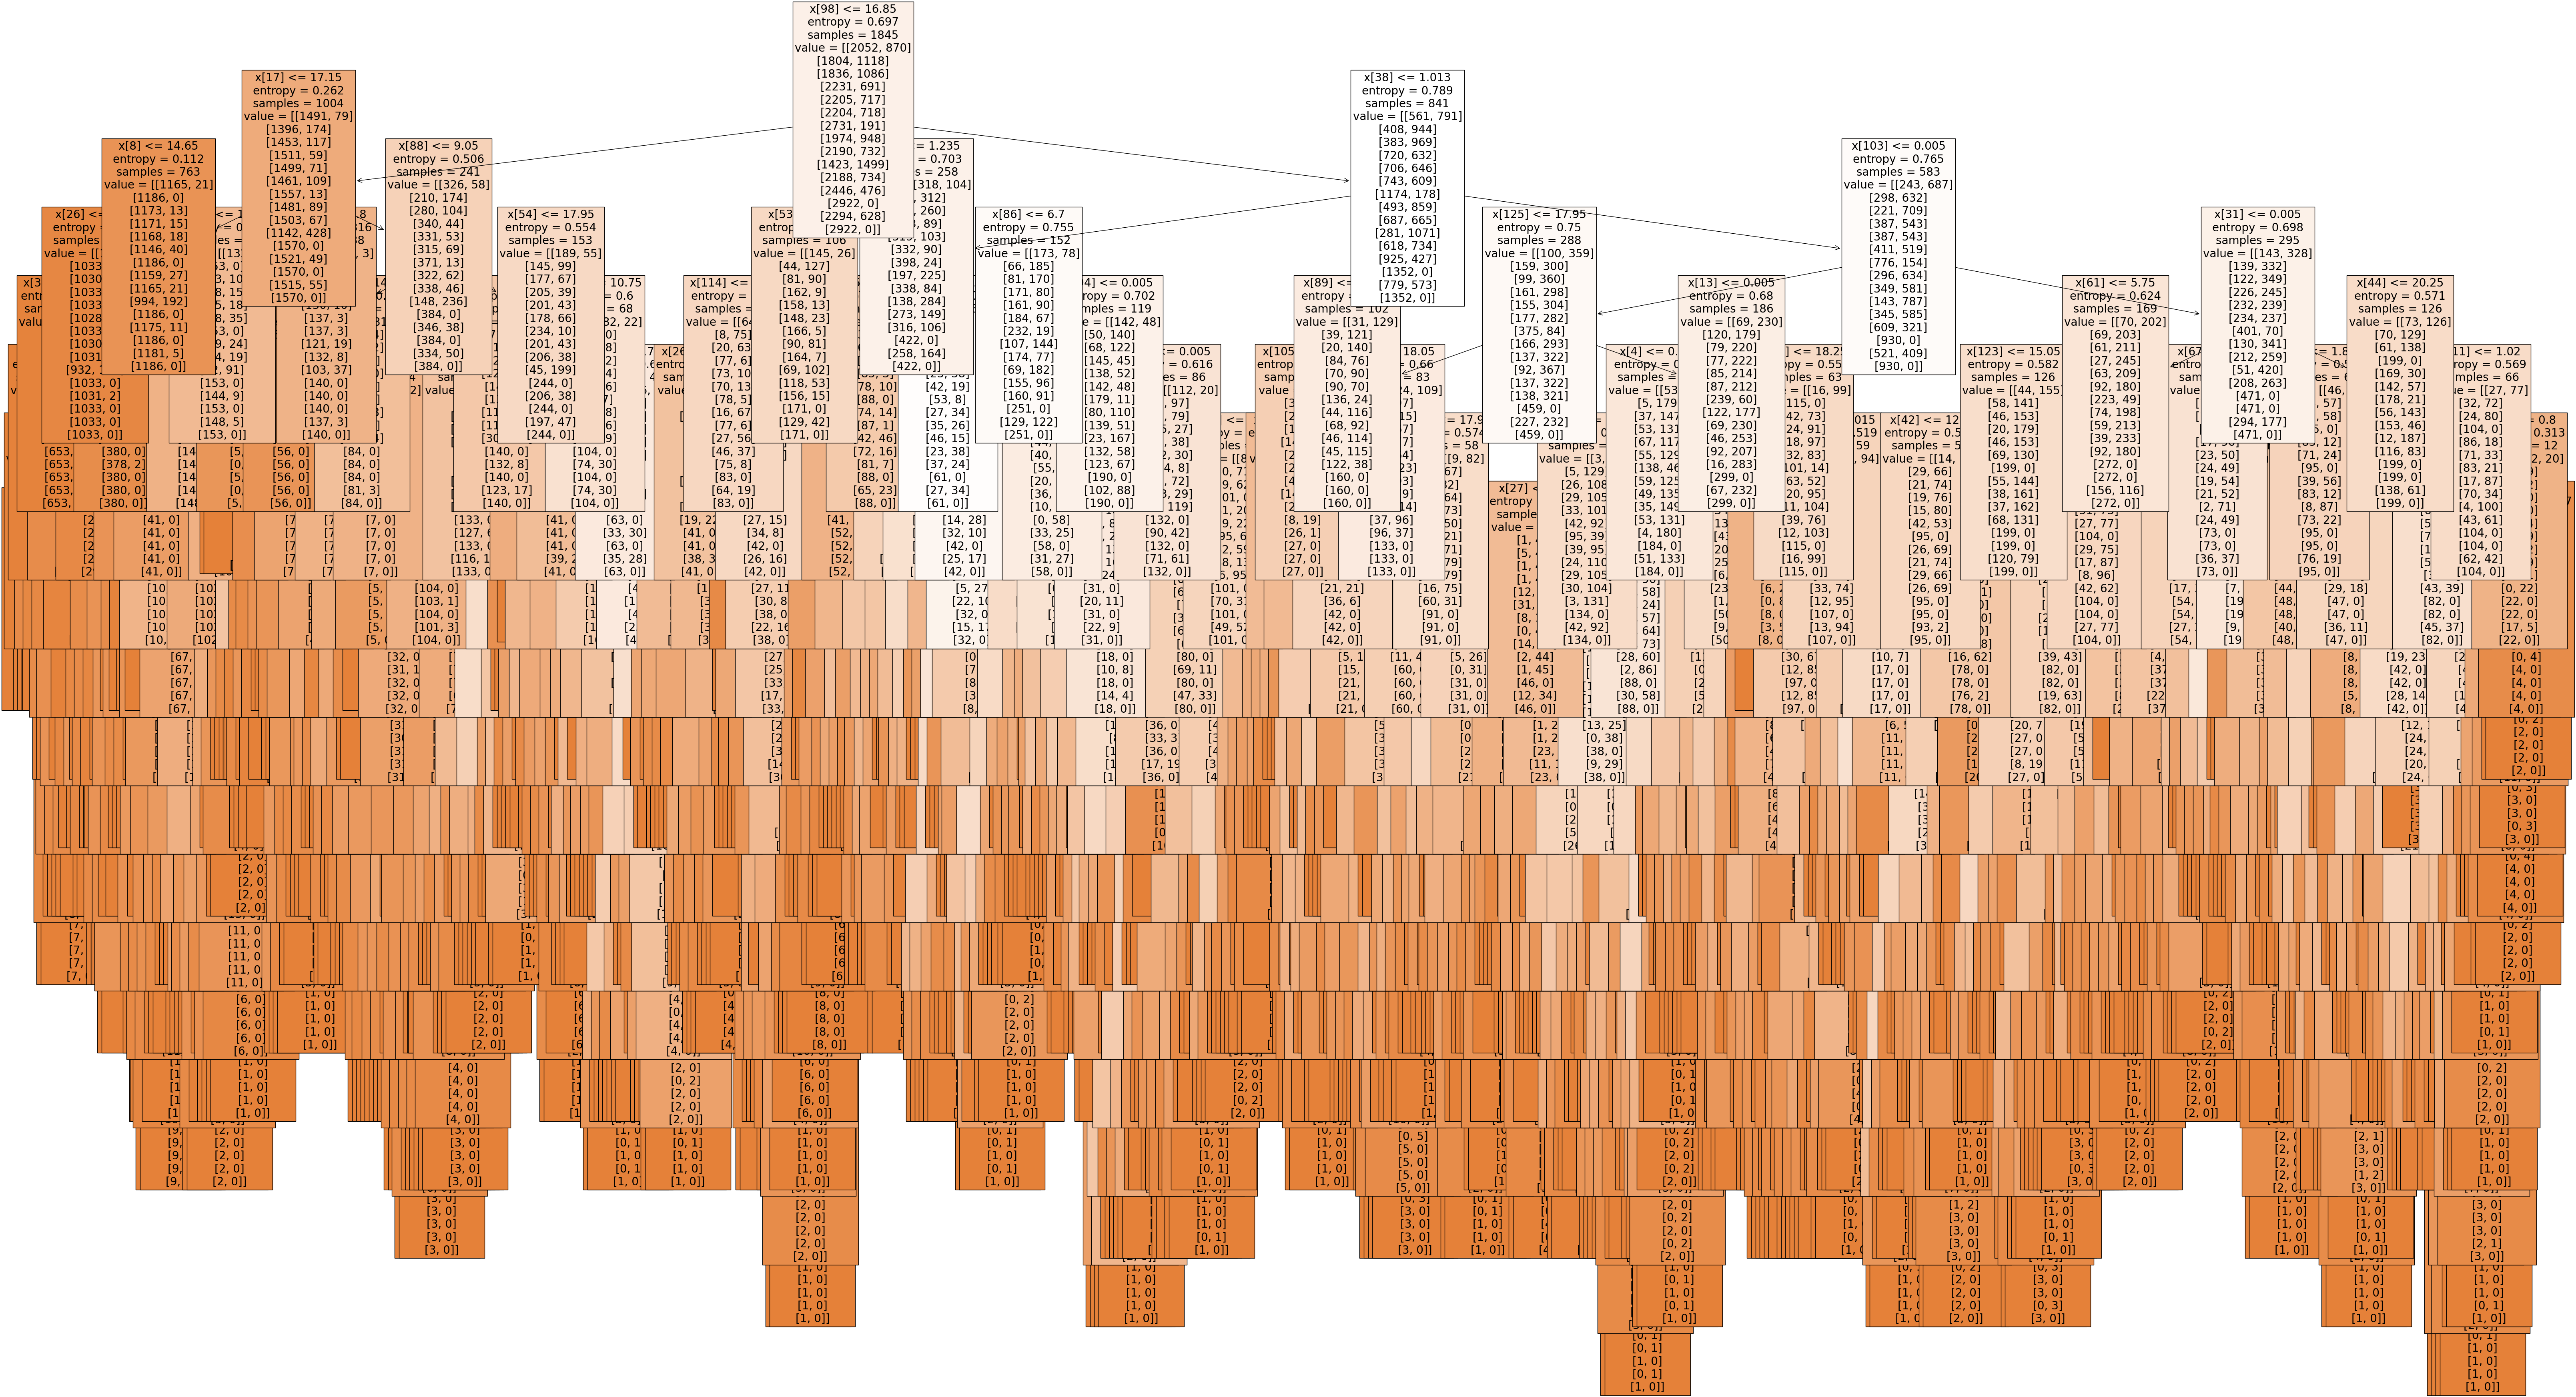

In [110]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=pred, filled=True)

In [111]:
fig.savefig(f"{path}/decision_tree_2.4.png")

In [121]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([3.57502581e-03, 4.10891528e-03, 4.00927484e-03, 4.46782114e-03,
       1.58869545e-02, 8.29654500e-03, 1.76794658e-02, 7.17935067e-03,
       3.22052793e-02, 4.15135535e-03, 3.42652209e-03, 4.45884432e-03,
       3.29984125e-03, 1.27711736e-02, 3.96424195e-03, 6.26667799e-03,
       7.30782438e-03, 1.62711005e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00703830e-03, 1.25385042e-02, 1.14258799e-03,
       9.50756273e-03, 1.20811776e-02, 2.29945751e-02, 3.12558607e-03,
       3.85866793e-03, 5.21286871e-03, 7.30872407e-03, 1.43890619e-02,
       5.94119703e-03, 1.04964217e-02, 3.55722050e-03, 3.68764991e-02,
       3.48983160e-03, 3.50842923e-03, 4.78133325e-03, 4.77600328e-03,
       1.62542006e-02, 7.22181284e-03, 2.42611160e-02, 5.12297069e-03,
       2.48663398e-02, 2.90107903e-03, 5.17889066e-03, 4.37463113e-03,
       4.70175051e-03, 8.48093542e-03, 5.00815716e-03, 8.88555887e-03,
       3.44630219e-03, 3.55126401e-03, 1.55525927e-02, 2.12897776e-03,
      

In [123]:
np.set_printoptions(threshold=1000)

In [125]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.57502581e-03, 4.10891528e-03, 4.00927484e-03, 4.46782114e-03,
         1.58869545e-02, 8.29654500e-03, 1.76794658e-02, 7.17935067e-03,
         3.22052793e-02],
        [4.15135535e-03, 3.42652209e-03, 4.45884432e-03, 3.29984125e-03,
         1.27711736e-02, 3.96424195e-03, 6.26667799e-03, 7.30782438e-03,
         1.62711005e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00703830e-03,
         1.25385042e-02, 1.14258799e-03, 9.50756273e-03, 1.20811776e-02,
         2.29945751e-02],
        [3.12558607e-03, 3.85866793e-03, 5.21286871e-03, 7.30872407e-03,
         1.43890619e-02, 5.94119703e-03, 1.04964217e-02, 3.55722050e-03,
         3.68764991e-02],
        [3.48983160e-03, 3.50842923e-03, 4.78133325e-03, 4.77600328e-03,
         1.62542006e-02, 7.22181284e-03, 2.42611160e-02, 5.12297069e-03,
         2.48663398e-02],
        [2.90107903e-03, 5.17889066e-03, 4.37463113e-03, 4.70175051e-03,
         8.48093542e-03, 5.00815716e-03, 8.88555887e-03, 3.44630219

In [127]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09740863, 0.06191758, 0.05927145, 0.09076625, 0.09428204,
       0.04652857, 0.03828363, 0.08143612, 0.0925595 , 0.06840252,
       0.09246468, 0.06722526, 0.04712292, 0.05906972, 0.00326113])

In [129]:
climate_nodate_cleaned.columns.tolist()

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',


In [131]:
variables = [
    'Basel',
    'Belgrade',
    'Budapest',
    'Debilt',
    'Dusseldorf',
    'Heathrow',
    'Kassel',
    'Ljubljana',
    'Maastricht',
    'Madrid',
    'Munchenb',
    'Oslo',
    'Sonnblick',
    'Stockholm',
    'Valentia'
]

In [133]:
important = pd.Series(sumarray, index = variables) #.sort_values(ascending = False)
important

Basel         0.097409
Belgrade      0.061918
Budapest      0.059271
Debilt        0.090766
Dusseldorf    0.094282
Heathrow      0.046529
Kassel        0.038284
Ljubljana     0.081436
Maastricht    0.092560
Madrid        0.068403
Munchenb      0.092465
Oslo          0.067225
Sonnblick     0.047123
Stockholm     0.059070
Valentia      0.003261
dtype: float64

['Basel', 'Belgrade', 'Budapest', 'Debilt', 'Dusseldorf', 'Heathrow', 'Kassel', 'Ljubljana', 'Maastricht', 'Madrid', 'Munchenb', 'Oslo', 'Sonnblick', 'Stockholm', 'Valentia']


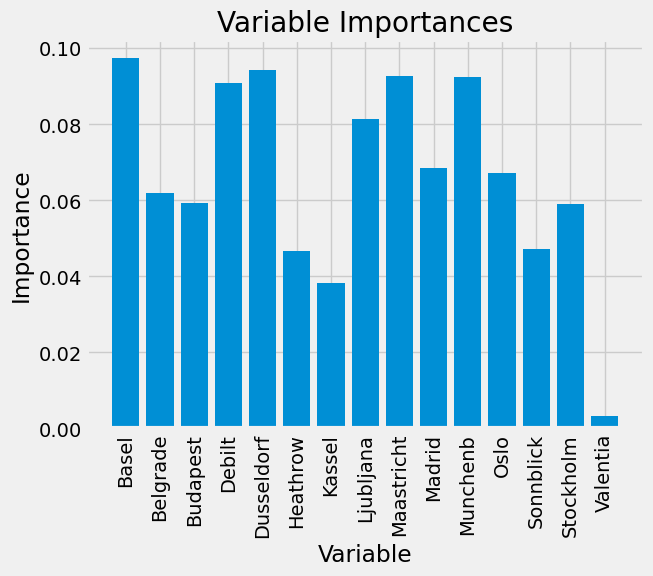

In [135]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(variables)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, variables, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### Munchenb

In [152]:
climate_munchenb = climate_nodate_cleaned[['MUNCHENB_cloud_cover','MUNCHENB_humidity','MUNCHENB_pressure','MUNCHENB_global_radiation','MUNCHENB_precipitation','MUNCHENB_sunshine','MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max']]
climate_munchenb

MUNCHENB_cloud_cover  MUNCHENB_humidity  MUNCHENB_pressure  \
0                         5               0.67             1.0304   
1                         6               0.72             1.0292   
2                         6               0.91             1.0320   
3                         6               0.90             1.0443   
4                         5               0.85             1.0430   
...                     ...                ...                ...   
22945                     2               0.76             1.0263   
22946                     6               0.70             1.0263   
22947                     7               0.64             1.0263   
22948                     6               0.75             1.0263   
22949                     5               0.83             1.0263   

       MUNCHENB_global_radiation  MUNCHENB_precipitation  MUNCHENB_sunshine  \
0                           0.20                    0.10                0.0   
1                           0.61                    0.30                5.1   
2                           0.20                    0.30                0.0   
3                           0.20                    0.01                0.0   
4                           0.65                    0.96                5.6   
...                          ...                     ...                ...   
22945                       1.37                    0.26                9.7   
22946                       1.37                    0.26                7.7   
22947                       1.37                    0.26                6.8   
22948                       1.37                    0.26                8.3   
22949                       1.37                    0.26                6.8   

       MUNCHENB_temp_mean  MUNCHENB_temp_min  MUNCHENB_temp_max  
0                     6.9                1.1               10.4  
1                     6.2                4.2               10.2  
2                     5.8                4.0                8.0  
3                     3.9                3.2                5.4  
4                     1.8               -3.0                6.0  
...                   ...                ...                ...  
22945                14.3                8.3               22.2  
22946                16.1                8.9               26.1  
22947                17.4               11.2               26.2  
22948                14.5                9.2               23.5  
22949                12.9                7.9               19.6  

[22950 rows x 9 columns]

In [154]:
weather

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [156]:
weather_munchenb = weather[['MUNCHENB_pleasant_weather']]
weather_munchenb

MUNCHENB_pleasant_weather
0                              0
1                              0
2                              0
3                              0
4                              0
...                          ...
22945                          0
22946                          0
22947                          0
22948                          0
22949                          0

[22950 rows x 1 columns]

In [158]:
X = climate_munchenb
y = weather_munchenb
X

MUNCHENB_cloud_cover  MUNCHENB_humidity  MUNCHENB_pressure  \
0                         5               0.67             1.0304   
1                         6               0.72             1.0292   
2                         6               0.91             1.0320   
3                         6               0.90             1.0443   
4                         5               0.85             1.0430   
...                     ...                ...                ...   
22945                     2               0.76             1.0263   
22946                     6               0.70             1.0263   
22947                     7               0.64             1.0263   
22948                     6               0.75             1.0263   
22949                     5               0.83             1.0263   

       MUNCHENB_global_radiation  MUNCHENB_precipitation  MUNCHENB_sunshine  \
0                           0.20                    0.10                0.0   
1                           0.61                    0.30                5.1   
2                           0.20                    0.30                0.0   
3                           0.20                    0.01                0.0   
4                           0.65                    0.96                5.6   
...                          ...                     ...                ...   
22945                       1.37                    0.26                9.7   
22946                       1.37                    0.26                7.7   
22947                       1.37                    0.26                6.8   
22948                       1.37                    0.26                8.3   
22949                       1.37                    0.26                6.8   

       MUNCHENB_temp_mean  MUNCHENB_temp_min  MUNCHENB_temp_max  
0                     6.9                1.1               10.4  
1                     6.2                4.2               10.2  
2                     5.8                4.0                8.0  
3                     3.9                3.2                5.4  
4                     1.8               -3.0                6.0  
...                   ...                ...                ...  
22945                14.3                8.3               22.2  
22946                16.1                8.9               26.1  
22947                17.4               11.2               26.2  
22948                14.5                9.2               23.5  
22949                12.9                7.9               19.6  

[22950 rows x 9 columns]

In [160]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950, 1)


In [162]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [164]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [166]:
# creating a RF classifier
clf4 = RandomForestClassifier()

In [168]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [170]:
start = time.time()
grid = GridSearchCV(clf4,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Hiroshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hiroshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hiroshi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Hiroshi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hiroshi\anaconda3\Lib\

Search took 4.9733788887659705 minutes


In [171]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


In [174]:
# creating a RF classifier with the best results from above
clf5 = RandomForestClassifier(n_estimators = 10, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf5.fit(X_train, y_train)

C:\Users\Hiroshi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=3, max_features=7,
                       min_samples_leaf=2, n_estimators=10)

In [176]:
# performing predictions on the test dataset
y_pred = clf5.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


In [178]:
pred = ['Bad weather','Good weather']

[Text(0.4, 0.875, 'x[8] <= 17.95\nentropy = 0.74\nsamples = 11581\nvalue = [14521, 3839]\nclass = Bad weather'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 7427\nvalue = [11783, 0]\nclass = Bad weather'),
 Text(0.6, 0.625, 'x[4] <= 0.005\nentropy = 0.98\nsamples = 4154\nvalue = [2738, 3839]\nclass = Good weather'),
 Text(0.4, 0.375, 'x[3] <= 1.135\nentropy = 0.102\nsamples = 2479\nvalue = [52, 3839]\nclass = Good weather'),
 Text(0.2, 0.125, 'entropy = 0.932\nsamples = 93\nvalue = [49, 92]\nclass = Good weather'),
 Text(0.6, 0.125, 'entropy = 0.009\nsamples = 2386\nvalue = [3, 3747]\nclass = Good weather'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 1675\nvalue = [2686, 0]\nclass = Bad weather')]

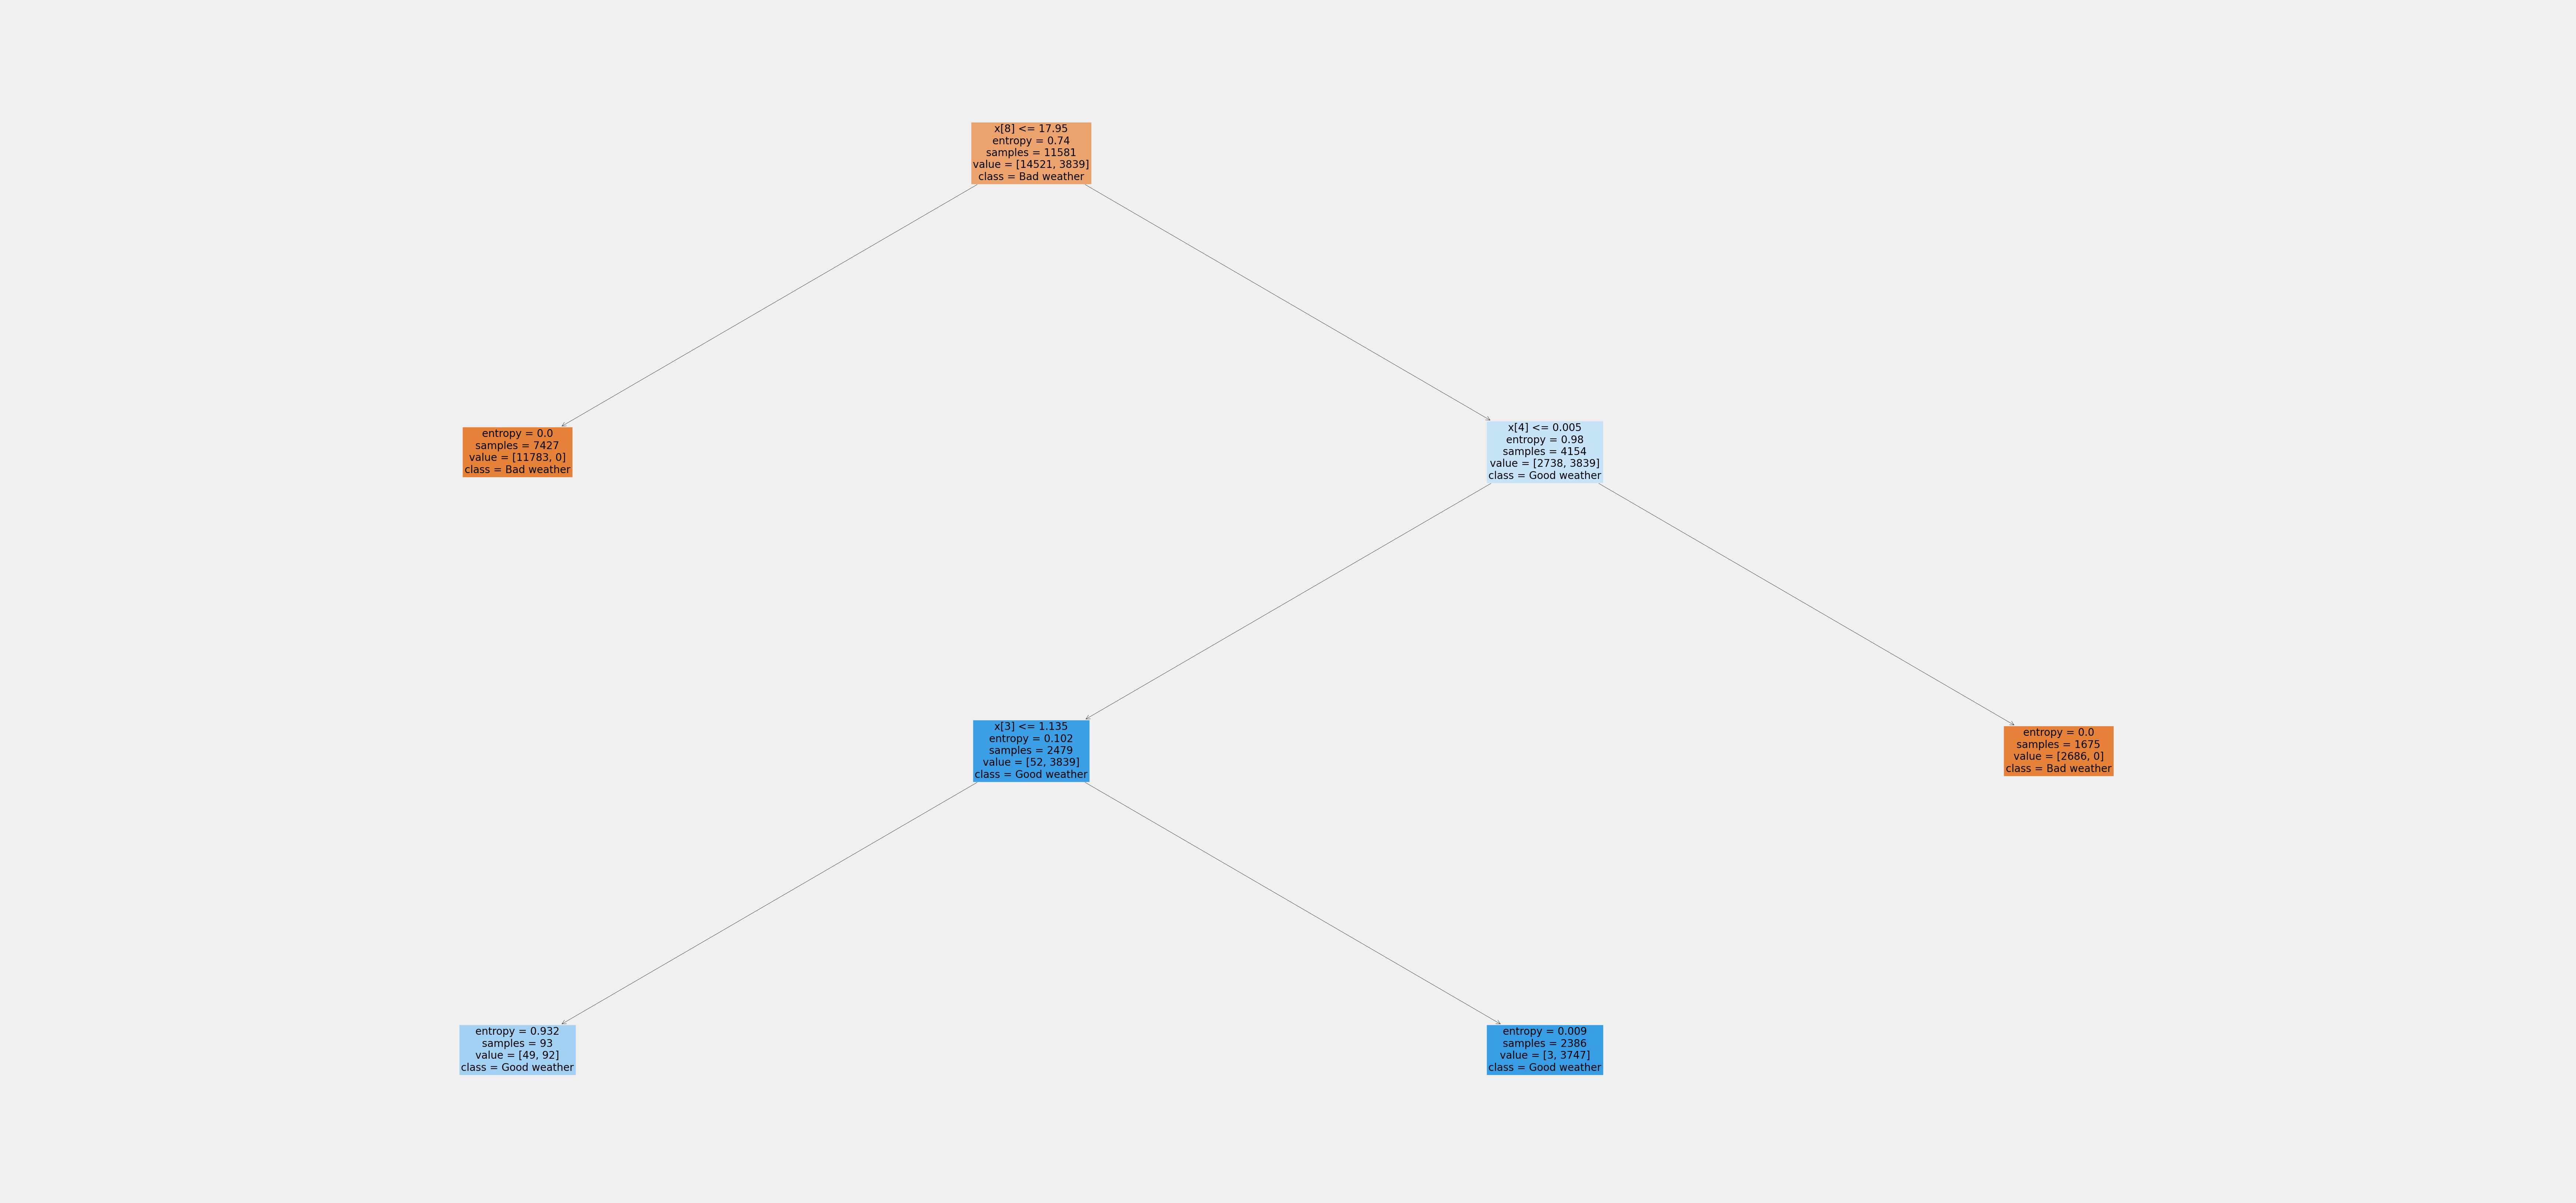

In [184]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf5.estimators_[5], fontsize = 20, class_names=pred, filled=True)

In [186]:
fig.savefig(f"{path}/decision_tree_munchenb.png")

In [192]:
np.set_printoptions(threshold=np.inf)
newarray = clf5.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.01966459, 0.        , 0.        , 0.00355133, 0.41926755,
       0.01650472, 0.        , 0.        , 0.54101181])

In [194]:
np.set_printoptions(threshold=1000)

In [196]:
variables = [
    'Cloud cover',
    'Humidity',
    'Pressure',
    'Global ratiation',
    'Precipitation',
    'Sunshine',
    'Temp mean',
    'Temp min',
    'Temp max'
]

In [198]:
important = pd.Series(newarray, index = variables) #.sort_values(ascending = False)
important

Cloud cover         0.019665
Humidity            0.000000
Pressure            0.000000
Global ratiation    0.003551
Precipitation       0.419268
Sunshine            0.016505
Temp mean           0.000000
Temp min            0.000000
Temp max            0.541012
dtype: float64

['Cloud cover', 'Humidity', 'Pressure', 'Global ratiation', 'Precipitation', 'Sunshine', 'Temp mean', 'Temp min', 'Temp max']


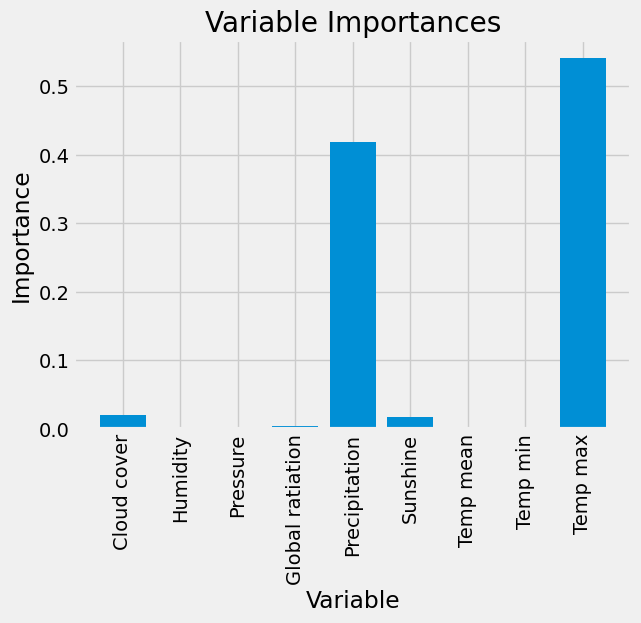

In [200]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(variables)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, variables, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');